# Coursework
# SPCE0038: Machine Learning with Big-Data

---

## Overview

This coursework is provided as a Jupyter notebook, which you will need to complete.  

Throughout the notebook you will need to complete code, analytic exercises (if equations are required please typeset your solutions using latex in the markdown cell provided) and descriptive answers. Much of the grading of the coursework will be performed automatically, so it is critical you name your variables as requested.

Before you turn this coursework in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says "YOUR ANSWER HERE" or `YOUR CODE HERE` and remove remove the `raise NotImplementedError()` exceptions that are thrown before you have added your answers. Do not add and remove cells but rather provide your answers in the spaces given.

Please also:
- Make sure your notebook executes without errors.
- Do not overwrite or rename any existing variables.
- Do not install code or packages in the notebooks.

Please rename the notebook filename to include your name in the filename.  And please also add your name below:

In [1]:
NAME = "22036444"

You will be able to run some basic tests in the notebook to check the basic operation of your code is as expected.  Although do not assume your responses are complete or fully correct just because the basic tests pass.

Once you have renamed the notebook file and completed the exercises, please upload the notebook to Moodle.


---

## AstroML

The data used is this coursework is obtained using [AstroML](http://www.astroml.org), a python package for machine learning for astronomy.  Although we take data from AstroML, this coursework is not based on standard AstroML examples.  So you will *not* find the solutions in AstroML examples!

## SDSS

The data obtained through AstroML was observed by the [Sloan Digital Sky Survey](https://www.sdss.org/) (SDSS), which began observations in 2000.  SDSS data have lead to many scientific advances and the experiment is widely seen as one of the most successful surveys in the history of astronomy.

---

## Dependencies

- Standard course dependencies (e.g. numpy, scikit-learn, etc.)
- [AstoML](http://www.astroml.org)
- [AstroPy](http://www.astropy.org/)

---

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def check_var_defined(var):
    try:
        exec(var)
    except NameError:
        raise NameError(var + " not defined.")
    else:
        print(var + " defined.")

## Part 1: Regression

In these exercises we will consider the regression problem of the astonomical distance modulus vs redshift relationship.

In astronomy, the [distance modulus](https://en.wikipedia.org/wiki/Distance_modulus) specifies the difference between the apparent and absolute magnitudes of an astronomnical object.  It provides a way of expressing astrophysical distances. 

Astronomical [redshift](https://en.wikipedia.org/wiki/Redshift) specifies the shift in wavelength that astronomical objects undergo due to the expansion of the Universe.  Due to Hubble's Law, more distance objects experience a greater redshift.


In [4]:
!pip install astroML
!pip install astropy
from astroML.datasets import generate_mu_z
%matplotlib inline
import seaborn as sns
sns.set()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 KB 3.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# Load data
m = 150
z_sample, mu_sample, dmu = generate_mu_z(m, random_state=3)
z_sample.shape, mu_sample.shape

((150,), (150,))

*Plot the distance modulus ($\mu$) vs redhift ($z$), including error bars.*

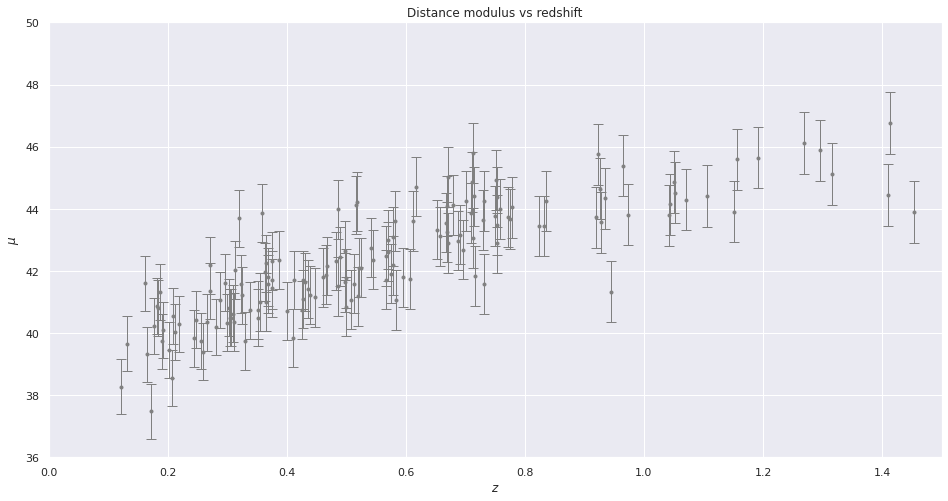

In [6]:
# Plot data
def plot_dist_mod():
    plt.figure(figsize=(16, 8))
    plt.errorbar(z_sample, mu_sample, dmu, 
          marker='.', linestyle='', color='grey', 
          capsize=5, lw=1)
    plt.xlabel('$z$')
    plt.ylabel('$\mu$')
    plt.title('Distance modulus vs redshift')
    plt.ylim(36, 50)
    plt.xlim(0, 1.5)


#     plt.show()
plot_dist_mod()

Recall the normal equations for linear regression follow by analytically minimising the cost function: 

$$\min_\theta\ C(\theta) = \min_\theta \ (X \theta - y)^{\rm T}(X \theta - y).$$

Show analytically that the solution is given by 

$$ \hat{\theta} = \left( X^{\rm T} X \right)^{-1} X^{\rm T} y. $$

[Matrix calculus identities](https://en.wikipedia.org/wiki/Matrix_calculus) may be useful (note that we use the denominator layout convention).

*Expand the cost function and drop terms that do not depend on $\theta$ (use latex mathematics expressions):*

$$
\begin{aligned}
C(\theta)& = (X \theta - y)^{\rm T}(X \theta - y)\\
& = ((X \theta)^{\rm T} - y^{\rm T})(X \theta - y)\\
& = (X \theta)^{\rm T}X \theta - (X \theta)^{\rm T}y - y^{\rm T}X \theta + y^{\rm T}y\\
& = (X \theta)^{\rm T}X \theta - (X \theta)^{\rm T}y - (X \theta)^{\rm T}y\\
& = (X \theta)^{\rm T}X \theta - 2(X \theta)^{\rm T}y
\end{aligned}
$$



Expanding cost function gives:
$$ C(\theta) = (X \theta - y)^T (X \theta - y) = \theta^T X^T X \theta - 2\theta^T X^T y + y^T y $$

Dropping $y^T y$ gives:
$$ C(\theta) = \theta^T X^T X \theta - 2\theta^T X^T y $$

*Set the derivative to zero and solve for $\theta$ (use latex mathematics expressions):*


$$
\begin{aligned}
& \frac{\partial C}{\partial \theta} = 2X^T X \theta - 2X^T y  = 0\\
& X^T X \theta = X^T y \\
\rightrightarrows \quad
 & \hat{\theta} = (X^T X)^{-1} X^T y
\end{aligned}
$$



*Solve for $\theta$ by numerically implementing the analytic solution given above.*

In [7]:
def compute_theta_lin_reg(X, y):
    X = np.c_[np.ones(len(y)).T, X]
    return np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(y)


In [8]:
assert compute_theta_lin_reg(z_sample, mu_sample).shape == (2,)
theta = compute_theta_lin_reg(z_sample, mu_sample)
(theta_c, theta_m) = theta
print("Linear regression parameters recovered analytically: intercept={0:.4f}, slope={1:.4f}".format(theta_c, theta_m))

Linear regression parameters recovered analytically: intercept=39.5505, slope=4.9538


In [9]:
check_var_defined('theta_c')
check_var_defined('theta_m')

theta_c defined.
theta_m defined.


*Write a method to make a prediction for a given redshift.*

In [10]:
def predict_lin_reg(theta, x):
    return np.c_[np.ones((x.shape[0], 1)), x].dot(theta)


*Predict the distance modulus for a range of redshift values between 0.01 and 1.5 and plot the predicted curve overlayed on data (make a new plot; do not revise the plot above).  Call the variable used to store the predictions for your polynomial model `mu_pred_lin`.*

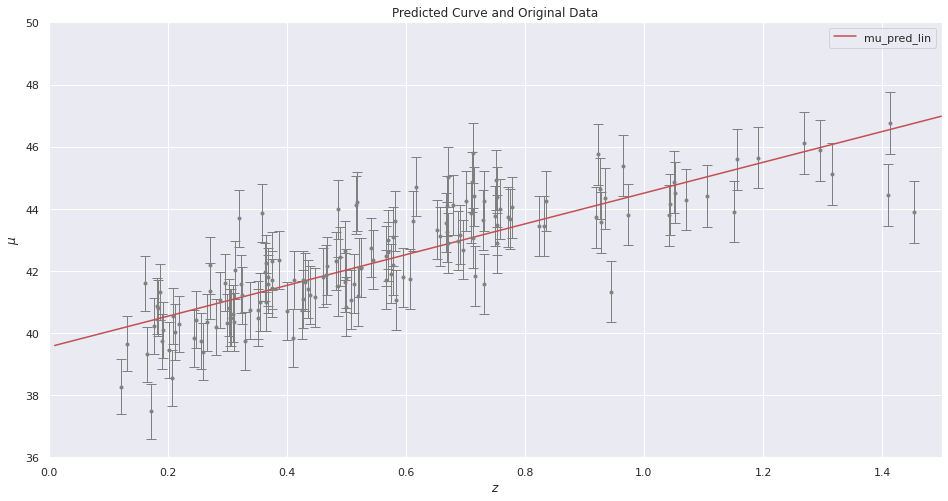

In [11]:
z = np.linspace(0.01, 1.5, 1000)
plot_dist_mod()

mu_pred_lin = predict_lin_reg(theta, z)
plt.plot(z, mu_pred_lin, "r-", label='mu_pred_lin')

plt.title('Predicted Curve and Original Data')
plt.legend()
plt.show()
# plt.scatter(z_sample, mu_sample)
# plt.show()


In [12]:
check_var_defined('mu_pred_lin')
assert mu_pred_lin.shape == (len(z),), "Make sure the shape of your predictions is correct"

mu_pred_lin defined.


*Solve for the parameters $\theta$ using Scikit-Learn.*

In [13]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(z_sample.reshape(-1, 1), mu_sample.reshape(-1, 1))
# y = reg.predict(z.reshape(-1,1))
lin_reg.intercept_ = lin_reg.intercept_[0]
lin_reg.coef_ = lin_reg.coef_[0].reshape(-1)
print(lin_reg.intercept_)
print(lin_reg.coef_[0])

39.55051436116671
4.9537838287233384


In [14]:
print("Linear regression parameters recovered by scikit-learn: intercept={0:.4f}, slope={1:.4f}"
      .format(lin_reg.intercept_, lin_reg.coef_[0]))

Linear regression parameters recovered by scikit-learn: intercept=39.5505, slope=4.9538


*Extend your model to include polynomial features up to degree 15 (using Scikit-Learn).  Use variable `lin_reg_poly` for your revised model.*

In [15]:
degree = 15
bias = False
from sklearn.preprocessing import PolynomialFeatures

def compute_poly_features(featrues, degree, bias):
    # Return polynomial features of samples and class
    pf = PolynomialFeatures(degree=degree, include_bias=bias)
    zz = pf.fit_transform(featrues.reshape(-1, 1))
    return zz, pf


z_sample_poly, poly_features = compute_poly_features(z_sample, degree, bias)

# Train model
lin_reg_poly = LinearRegression()
print(z_sample_poly.shape)
lin_reg_poly.fit(z_sample_poly, mu_sample)


(150, 15)


LinearRegression()

In [16]:
check_var_defined('lin_reg_poly')

lin_reg_poly defined.


*Plot the data and the predictions of your models considered so far (linear and polynomial regression).  Call the variable used to store the predictions for your polynomial model `mu_pred_poly`.*

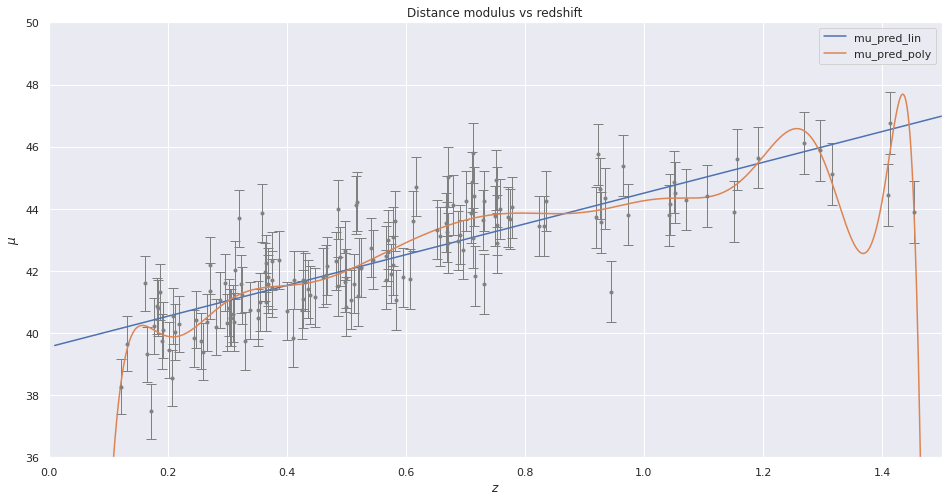

In [17]:

plot_dist_mod()
plt.ylim(36, 50)
plt.xlim(0, 1.5)
mu_pred_poly = lin_reg_poly.predict(poly_features.transform(z.reshape(-1, 1)))

plt.plot(z, mu_pred_lin, label='mu_pred_lin')
plt.plot(z, mu_pred_poly, label='mu_pred_poly')

plt.legend()
plt.show()

In [18]:
check_var_defined('mu_pred_poly')
assert mu_pred_poly.shape == (len(z),)

mu_pred_poly defined.


*Comment on the accuracy of your models.*

- The **linear model** has a significant number of data points spaced away from the line, can be considered as underfitted due to the simplicity of the linear regression and the complexity of the data.

- The **polynomial regression** line corresponds too closely or exactly to some sets of data($z>1.1$), and may therefore fail to fit to additional data or predict other observations reliably and can be considered as overfitted.

*Improve your polynomial model and use the improved model to make predictions. Call the variable used to store the polynomial model `ridge_reg_poly`. Call the variable used to store the predictions for your polynomial model `mu_pred_poly_improved`.*

In [19]:
assert mu_pred_poly.shape == (len(z),)

In [20]:
from sklearn.linear_model import Ridge

ridge_reg_poly = Ridge(alpha=.5)
ridge_reg_poly.fit(z_sample_poly, mu_sample)

mu_pred_poly_improved = ridge_reg_poly.predict(poly_features.transform(z.reshape(-1, 1)))


In [21]:
check_var_defined('ridge_reg_poly')
check_var_defined('mu_pred_poly_improved')
assert mu_pred_poly_improved.shape == (len(z),), "Make sure the shape of your predictions is correct"

ridge_reg_poly defined.
mu_pred_poly_improved defined.


*Plot the predictions made with new model and all previous models considered.*

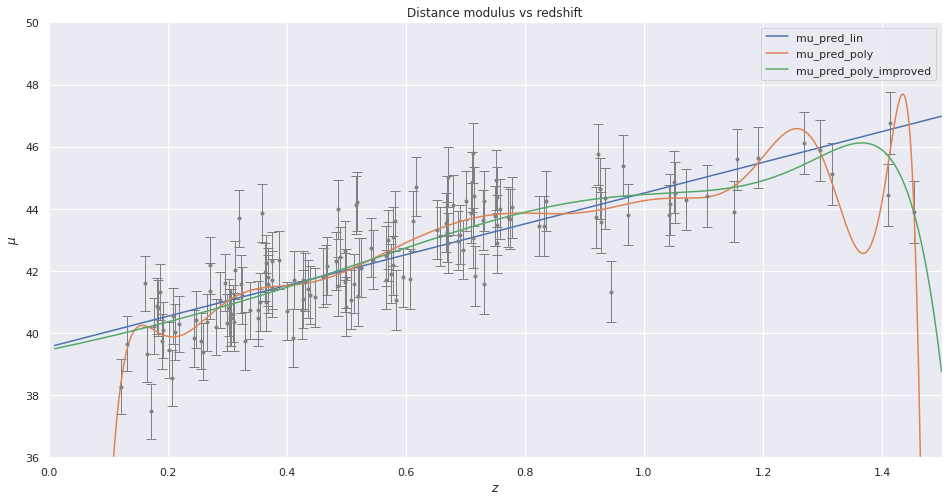

In [22]:
plot_dist_mod()
plt.plot(z, mu_pred_lin, label='mu_pred_lin')
plt.plot(z, mu_pred_poly, label='mu_pred_poly')
plt.plot(z, mu_pred_poly_improved, label='mu_pred_poly_improved')

plt.legend()
plt.show()

*Compute the RMS error between your predictions and the* data samples*.*

In [23]:
# Define a general function to compute the RMS error
from sklearn.metrics import mean_squared_error


def compute_rms(mu_1, mu_2):
    assert mu_1.shape == mu_2.shape
    return mean_squared_error(mu_1, mu_2, squared=False)

In [24]:
assert np.isclose(compute_rms(mu_pred_lin, mu_pred_lin), 0.0)

In [25]:
# Compute the RMS error between the data and the predictions for each model.
# Use variables rms_sample_lin, rms_sample_poly and rms_sample_poly_improved.

rms_sample_lin = compute_rms(lin_reg.predict(z_sample.reshape(-1, 1)), mu_sample)
rms_sample_poly = compute_rms(lin_reg_poly.predict(z_sample_poly), mu_sample)
rms_sample_poly_improved = compute_rms(ridge_reg_poly.predict(z_sample_poly), mu_sample)

In [26]:
# Print RMS values computed.
print("rms_sample_lin = {0:.4f}".format(rms_sample_lin))
print("rms_sample_poly = {0:.4f}".format(rms_sample_poly))
print("rms_sample_poly_improved = {0:.4f}".format(rms_sample_poly_improved))

rms_sample_lin = 1.0084
rms_sample_poly = 0.8855
rms_sample_poly_improved = 0.9322


In [27]:
check_var_defined('rms_sample_lin')

rms_sample_lin defined.


In [28]:
check_var_defined('rms_sample_poly')

rms_sample_poly defined.


In [29]:
check_var_defined('rms_sample_poly_improved')

rms_sample_poly_improved defined.


*Comment on what models you believe are best.*

The improved polynomial model

Because I think the best model should have a good trade-off between bias and variance, underffiting and overfitting, and RMSE value should not be the only metric for comparison.

Using our cosmological concordance model we can predict the theoretical distance modulus vs redshift relationship using our understanding of the physics.

In [30]:
from astroML.cosmology import Cosmology

cosmo = Cosmology()
mu_cosmo = np.array(list(map(cosmo.mu, z)))
mu_cosmo.shape

        Use astropy.cosmology instead. [warnings]
        Use astropy.cosmology instead.


(1000,)

*Plot the data, predictions made with all regression models, and the values predicted by the cosmological model.*

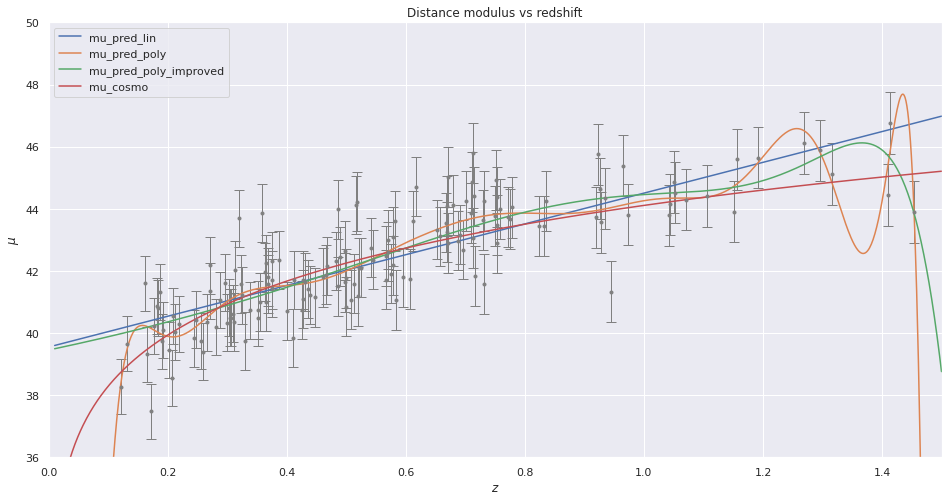

In [31]:
plot_dist_mod()
plt.plot(z, mu_pred_lin, label='mu_pred_lin')
plt.plot(z, mu_pred_poly, label='mu_pred_poly')
plt.plot(z, mu_pred_poly_improved, label='mu_pred_poly_improved')
plt.plot(z, mu_cosmo, label='mu_cosmo')
plt.ylim(36, 50)
plt.xlim(0, 1.5)

plt.legend()
plt.show()

plt.sca
plt.show()

*Compute the RMS error between the predictions made by the cosmological model and each of the regression models, over the sample array `z`.*

In [32]:
# Compute the RMS error between the data and the predictions for each model.
# Use variables rms_cosmo_lin, rms_cosmo_poly and rms_cosmo_poly_improved.

mu_cosmo = np.array(list(map(cosmo.mu, z)))
rms_cosmo_lin = compute_rms(mu_pred_lin, mu_cosmo)
rms_cosmo_poly = compute_rms(mu_pred_poly, mu_cosmo)
rms_cosmo_poly_improved = compute_rms(mu_pred_poly_improved, mu_cosmo)

#
# mu_cosmo = np.array(list(map(cosmo.mu, z_sample)))
# rms_cosmo_lin = compute_rms(lin_reg.predict(z_sample.reshape(-1, 1)), mu_cosmo)
# rms_cosmo_poly = compute_rms(lin_reg_poly.predict(z_sample_poly), mu_cosmo)
# rms_cosmo_poly_improved = compute_rms(ridge_reg_poly.predict(z_sample_poly), mu_cosmo)

In [33]:
# Print RMS values computed.
print("rms_cosmo_lin = {0:.4f}".format(rms_cosmo_lin))
print("rms_cosmo_poly = {0:.4f}".format(rms_cosmo_poly))
print("rms_cosmo_poly_improved = {0:.4f}".format(rms_cosmo_poly_improved))

rms_cosmo_lin = 1.1252
rms_cosmo_poly = 20.6652
rms_cosmo_poly_improved = 1.1726


In [34]:
check_var_defined('rms_cosmo_lin')

rms_cosmo_lin defined.


In [35]:
check_var_defined('rms_cosmo_poly')

rms_cosmo_poly defined.


In [36]:
check_var_defined('rms_cosmo_poly_improved')

rms_cosmo_poly_improved defined.


*Comment on the RMS values computed and the implications for the accuracy of the different regression models considered.*


- The **linear model** that produced the largest sample RMSE due to underfitting, but as commented above, it does not suffer from the problem of overfitting and result in the lowest RMSE value comparing with `mu_cosmo`. So despite the fact that the linear fit line does not look well-fitted, it still produced the lowest error and can be seen as the most accurate model using RMSE metric.

- The **polynomial model** suffers severely from overfitting, the low sample RMSE and the significantly high `mu_cosmo` RMSE is the proof of the fact, which also suggests that this model is actually of the lowest accuracy.

- The improved polynomial regression didn't produce the lowest sample RMSE,but perform well enough comparing with predictions of `mu_cosmo`, only slightly higher than the value of `rms_cosmo_lin` of the linear model. And at least it seems more fitted to the data comparing a straight line(the linear model).

---

## Part 2: Classification

In these exercises we will consider classification of [RR Lyrae](https://en.wikipedia.org/wiki/RR_Lyrae_variable) variable stars.  RR Lyrae variables are often used as standard candles to measure astronomical distances since their period of pulsation can be related to their absolute magnitude.

Observations of star magnitudes are made in each [SDSS filter band](http://skyserver.sdss.org/dr2/en/proj/advanced/color/sdssfilters.asp): u, g, r, i, z.

We will consider the space of astronomical "colours" to distinguish RR Lyraes from background stars.  Astronomical colours are simply differences in magnitudes between bands, e.g. u-g, g-r, r-i, i-z.  You can find further background [here](https://en.wikipedia.org/wiki/Color%E2%80%93color_diagram).

First, download the data.  (This may take some time on first execution.  Subsequently executions will read from cached data on your system.)

In [37]:
# Load data
from astroML.datasets import fetch_rrlyrae_combined

X, y = fetch_rrlyrae_combined()


downloading cross-matched SDSS/2MASS dataset from https://github.com/astroML/astroML-data/raw/main/datasets/stripe82calibStars_v2.6.dat.gz to /root/astroML_data

uncompressing file...



You can learn more about the format of the returned data [here](http://www.astroml.org/modules/generated/astroML.datasets.fetch_rrlyrae_combined.html).  In particular, note that the columns of `X` are u-g, g-r, r-i, i-z.

*Construct a Pandas DataFrame for the `X` data and a Series for the `y` data.  Call your Pandas objects `X_pd` and `y_pd` respectively.*

Be sure to give your colums the correct colour name, e.g. 'u-g'.

In [38]:
import pandas as pd

cols = ['u-g', 'g-r', 'r-i', 'i-z']
X_pd = pd.DataFrame(X, columns=cols)

In [39]:
check_var_defined('X_pd')
X_pd.head()

X_pd defined.


,u-g,g-r,r-i,i-z
0,1.250999,0.394000,0.137000,0.061999
1,1.048000,0.339001,0.151999,0.023001
2,1.008001,0.341999,0.129000,0.203001
3,0.965000,0.392000,0.149000,0.150000
4,1.040001,0.333000,0.125999,0.101999


In [40]:
y_pd = pd.Series(y)

In [41]:
check_var_defined('y_pd')
y_pd.head()

y_pd defined.


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64

*Combine your data and targets into a single Pandas DataFrame, labelling the target column 'target'.  Call the resulting Pandas DataFrame `X_pd_all`.*

In [42]:
X_pd_all = X_pd.join(y_pd.rename('target'))

In [43]:
check_var_defined('X_pd_all')
X_pd_all.head()

X_pd_all defined.


,u-g,g-r,r-i,i-z,target
0,1.250999,0.394000,0.137000,0.061999,0.0
1,1.048000,0.339001,0.151999,0.023001,0.0
2,1.008001,0.341999,0.129000,0.203001,0.0
3,0.965000,0.392000,0.149000,0.150000,0.0
4,1.040001,0.333000,0.125999,0.101999,0.0


*Add a 'target description' column to your existing `X_pd_all` DataFrame, with fields 'Background' and 'RR Lyrae' to specify the target type.*

In [44]:
# pd=X_pd_all.copy(deep=True)
X_pd_all['target description'] = X_pd_all.apply(lambda x: 'RR Lyrae' if x.target else 'Background', axis=1)

In [45]:
X_pd_all.head()
X_pd_all.tail()

,u-g,g-r,r-i,i-z,target,target description
93136,0.962999,0.059000,-0.025999,-0.025000,1.0,RR Lyrae
93137,1.059999,0.185001,0.050999,-0.023998,1.0,RR Lyrae
93138,1.044001,0.212000,0.035000,0.002001,1.0,RR Lyrae
93139,1.064999,0.172001,0.042000,0.003000,1.0,RR Lyrae
93140,1.125999,0.065001,-0.017000,-0.057999,1.0,RR Lyrae


*How many RR Lyrae variable stars are there in the dataset (i.e compute `n_rrlyrae`)?*

In [46]:
n_rrlyrae = len(X_pd_all[(X_pd_all.target == 1)])
# X_pd_all.target.value_counts()

In [47]:
check_var_defined('n_rrlyrae')
print("n_rrlyrae = {0}".format(n_rrlyrae))

n_rrlyrae defined.
n_rrlyrae = 483


*How many background stars are there in the dataset (i.e. compute `n_background`)?*

In [48]:
n_background = int(X_pd_all.target.size - n_rrlyrae)

In [49]:
check_var_defined('n_background')
print("n_background = {0}".format(n_background))

n_background defined.
n_background = 92658


*Plot scatter plot pairs for all colour combinations using `seaborn`.  Colour the points by target type. Make sure the distribution plots are normalised to have an area of 1 under the curve for each of the classes.*

In [50]:
%matplotlib inline
import seaborn as sns

sns.set()

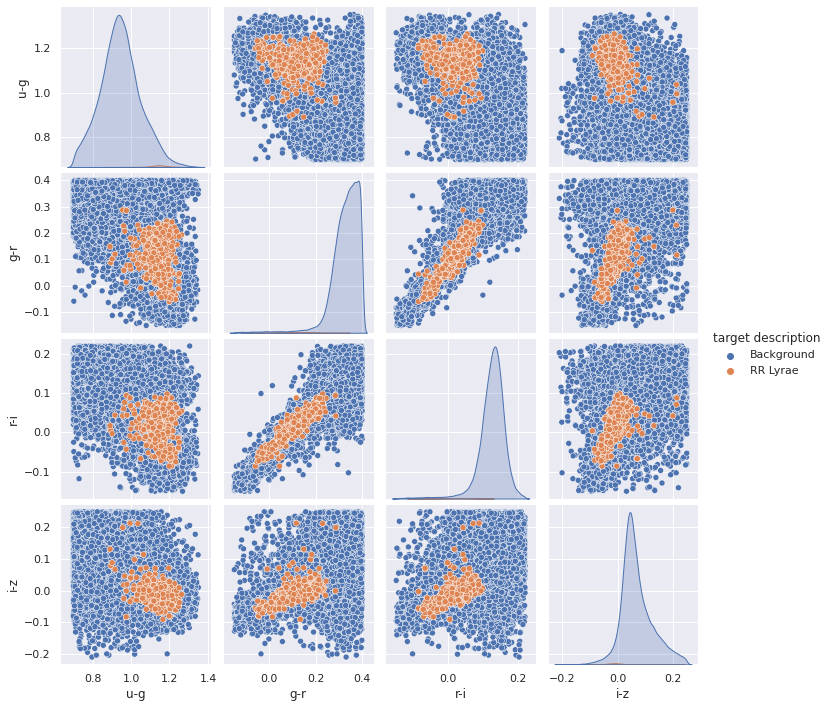

In [51]:
sns.pairplot(X_pd_all,
             hue='target description',
             diag_kws=dict(common_norm=True),
             x_vars=cols,
             y_vars=cols,
             # corner=True,
             diag_kind='kde')

Let's separate the data into training and test sets, keeping 25% of the data for testing.  

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

First let's consider 1D classification for the zeroth colour, i.e. $u-g$. 

In [53]:
ind = 0
col = cols[ind]
col

'u-g'

In [54]:
X_train_1d = X_train[:, ind]
X_train_1d = X_train_1d.reshape(-1, 1)
X_test_1d = X_test[:, ind]
X_test_1d = X_test_1d.reshape(-1, 1)

To get some further intuition about the 1D classiciation problem consider a 1D plot of
class against colour.

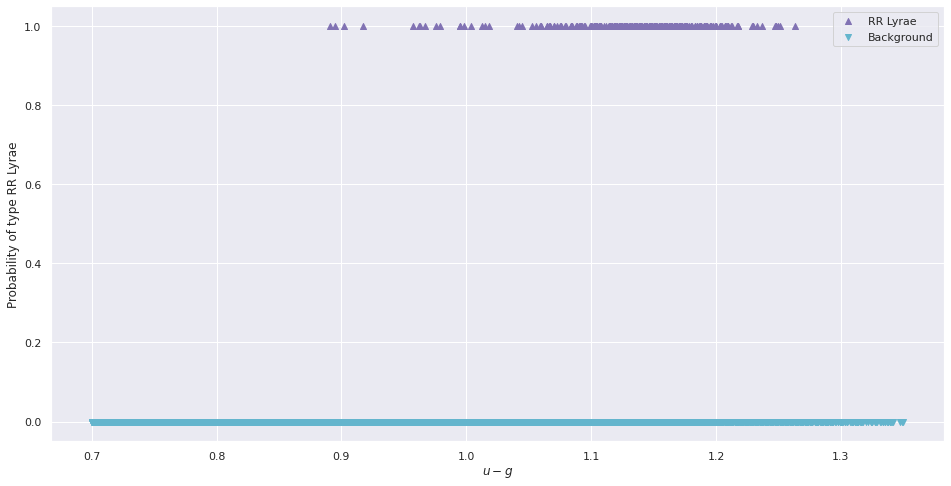

In [55]:
def plot_scatter():
    plt.figure(figsize=(16, 8))
    plt.scatter(X_train_1d[y_train == 1], y_train[y_train == 1], c='m', marker='^', label='RR Lyrae')
    plt.scatter(X_train_1d[y_train == 0], y_train[y_train == 0], c='c', marker='v', label='Background')
    plt.xlabel('$' + col + '$')
    plt.ylabel('Probability of type RR Lyrae')


plot_scatter()
plt.legend()

*Given the plot shown above, comment on how well you expect logistic regression to perform.*

The logistic regression will not perform well due to its limitation of assumption of linearity (which means it can only produce a linear decision surface) and the highly imbalenced dataset, it is obvious we cannot set a good boundary between background and target with a single line.

*Where would you guess the decision bounary should lie?  Set the variable `decision_boundary_guess` to your guess.*

In [56]:
decision_boundary_guess = np.max(X_train_1d)

In [57]:
check_var_defined('decision_boundary_guess')
print("decision_boundary_guess = {0:.4f}".format(decision_boundary_guess))

decision_boundary_guess defined.
decision_boundary_guess = 1.3500


Use Scikit-Learn to perform logistic regression to classify the two classes for this 1D problem.

First, set the inverse regularation strength `C` such that regularisation is effecitvely not performed.

In [58]:
C = 1e10

*Second, fit the model using Scikit-Learn. Use the variable `clf` for your classification model.*

In [59]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=1, C=C)
clf.fit(X_train_1d, y_train)

LogisticRegression(C=10000000000.0, random_state=1)

In [60]:
check_var_defined('clf')

clf defined.


*Compute the decision boundary of the logistic regression model fitted by Scikit-Learn.  User variable `decision_boundary_sklearn` for your result.*

(Ensure your result is a scalar and not an array of length 1.)

In [61]:
decision_boundary_sklearn = (-clf.intercept_ / clf.coef_)[0][0]

In [62]:
check_var_defined('decision_boundary_sklearn')
assert not hasattr(decision_boundary_sklearn, "__len__")
print("decision_boundary_sklearn = {0:.4f}".format(decision_boundary_sklearn))

decision_boundary_sklearn defined.
decision_boundary_sklearn = 1.3719


*Evaluate the probabilities predicted by your logistic regression model over the domain specified by the variable `X_1d_new`. Use variable `y_1d_proba` for your computed probabilities.*

In [63]:
X_1d_new = np.linspace(0.3, 2.0, 1000).reshape(-1, 1)
y_1d_proba = clf.predict_proba(X_1d_new)

In [64]:
check_var_defined('y_1d_proba')

y_1d_proba defined.


*Plot the probability of a star being of type RR Lyrae against the colour variable considered.  Also plot the probability of being a Background star.  Overlay these plots on the scatter plot of class types.  Also plot the decision boundary that you guessed previously and the one computed by Scikit-Learn.*

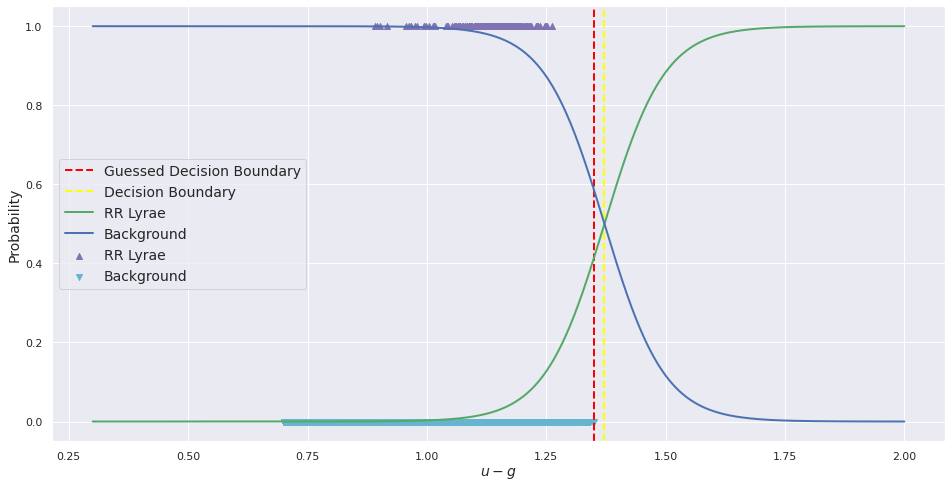

In [65]:
def plot_sklearn_boundary():
    plot_scatter()
    plt.axvline(decision_boundary_guess, color='red', linestyle="--", lw=2, label='Guessed Decision Boundary')
    plt.axvline(decision_boundary_sklearn, color='yellow', linestyle='--', lw=2, label='Decision Boundary')

    plt.plot(X_1d_new, y_1d_proba[:, 1], "g-", linewidth=2, label='RR Lyrae')
    plt.plot(X_1d_new, y_1d_proba[:, 0], "b-", linewidth=2, label="Background")

    plt.xlabel('$' + col + '$', fontsize=14)
    plt.ylabel("Probability", fontsize=14)


plot_sklearn_boundary()
plt.legend(loc="center left", fontsize=14)
plt.show()

*From inspection of your plot, how would all objects in the training set be classified?*

 They would all have been classified as RR Lyrae.

*Use your logistic regression model fitted by Scikit-Learn to predict the class of all objects in the test set. User variable `y_test_1d_pred` to specify your answer.*

In [66]:
y_test_1d_pred = clf.predict(X_test_1d)

In [67]:
check_var_defined('y_test_1d_pred')

y_test_1d_pred defined.


*How many objects are classified as of type RR Lyrae?  Use variable `n_rrlyrae_pred` to specify your answer.*

In [68]:
n_rrlyrae_pred = np.sum(y_test_1d_pred != 0)
np.sum(y_test == 0)

23159

In [69]:
check_var_defined('n_rrlyrae_pred')
assert n_rrlyrae_pred % 1 == 0  # check integer
print("n_rrlyrae_pred = {0}".format(n_rrlyrae_pred))

n_rrlyrae_pred defined.
n_rrlyrae_pred = 0


*How many objects are classified as of type Background?  Use variable `n_background_pred` to specify your answer.*

In [70]:
n_background_pred = np.sum(y_test_1d_pred == 0)


In [71]:
check_var_defined('n_background_pred')
assert n_background_pred % 1 == 0  # check integer
print("n_background_pred = {0}".format(n_background_pred))

n_background_pred defined.
n_background_pred = 23286


Let's check the Scikit-Learn result by solving the logistic regression problem (without regularisation) manually.

Recall that the cost function for logistic regression is given by
$$
C(\theta) = -\frac{1}{m} \sum_{i=1}^m 
\left [ 
y^{(i)} \log(\hat{p}^{(i)})
+
(1 - y^{(i)}) \log(1 - \hat{p}^{(i)})
\right],
$$


where

$$\hat{p} = \sigma(\theta^\text{T} x) = \frac{1}{1+\exp{(-\theta^\text{T} x)}}. $$

Show analytically that the derivative of the cost function is given by
$$\begin{eqnarray}
\frac{\partial C}{\partial \theta} 
&=& 
\frac{1}{m} \sum_{i=1}^m 
\left[ \sigma\left(\theta^{\rm T} x^{(i)} \right) - y^{(i)} \right]
x^{(i)}\\
&=&
\frac{1}{m} 
X^{\rm T}
\left[ \sigma\left(X \theta \right) - y \right]
\end{eqnarray}$$

(use latex mathematics expressions).

*First, simplify the cost function terms $\log(\hat{p})$ and $\log(1-\hat{p})$ to express in terms linear in $\log\left({1+{\rm e}^{-\theta^{\rm T}x}}\right)$.*

(You may drop $i$ superscripts for notational brevity.)

$$
\begin{aligned}
{Let}\quad & a = \log\left({1+{\rm e}^{-\theta^{\rm T}x}}\right)\\
&\rightrightarrows \log (\hat{p})=- a\\
&\rightrightarrows \log (1-\hat{p})=-\boldsymbol\theta^T {x}- a
\end{aligned}
$$

*Next, substitute these terms into the cost function and simplify to also express the cost function in terms linear in $\log\left({1+{\rm e}^{-\theta^{\rm T}x}}\right)$.*

$$
\begin{aligned}
C(\theta)
& = -\frac{1}{m} \sum_{i=1}^m\left [y^{(i)} \log(\hat{p}^{(i)})+(1 - y^{(i)}) \log(1 - \hat{p}^{(i)})\right] \\
& = -\frac{1}{m} \sum_{i=1}^m\left [-y^{(i)} a+(1 - y^{(i)}) (-\boldsymbol\theta^T {x}- a)\right] \\
& = \frac{1}{m} \sum_{i=1}^m\left [y^{(i)} a+(1 - y^{(i)}) (\boldsymbol\theta^T {x} + a)\right] \\
& = \frac{1}{m} \sum_{i=1}^m\left [ a+(1 - y^{(i)})(\boldsymbol\theta^T {x}) \right] \\
\end{aligned}
$$

*Now compute the derivative of the cost function with respect to variable $\theta_j$, i.e. compute $\partial C / \partial \theta_j$.*

$$
\begin{aligned}
\frac{\partial C(\theta)}{\partial \theta_j}
& = -\frac{1}{m}\frac{\partial}{\partial \theta_j}
\left (\sum_{i=1}^m\left [y^{(i)} \log(\hat{p}^{(i)})+(1 - y^{(i)}) \log(1 - \hat{p}^{(i)})\right]\right) \\
& = \frac{1}{m}\left(\frac{\partial}{\partial \theta_j}
\sum_{i=1}^m\left [ a +(1 - y^{(i)})(\boldsymbol\theta^T {\boldsymbol{x}}) \right]\right) \\
& =\frac{1}{m}\sum\left[\frac{-x_j \exp \left(-\boldsymbol\theta^T \boldsymbol{x}\right)}{1+\exp \left(-\boldsymbol\theta^T \boldsymbol{x}\right)}+ (1 - y^{(i)}) x_j\right]\\
& =\frac{1}{m}\sum\left[1-\frac{\exp \left(-\boldsymbol\theta^T \boldsymbol{x}\right)}{1+\exp \left(-\boldsymbol\theta^T \boldsymbol{x}\right)}-y^{(i)} \right]x_j\\
& =\frac{1}{m}\sum\left[\frac{1}{1+\exp \left(-\boldsymbol\theta^T \boldsymbol{x}\right)}-y^{(i)} \right]x_j\\
& = \frac{1}{m} \sum_{i=1}^m\left[\hat{p}^{(i)}-y^{(i)}\right]x_j\\
& =\frac{1}{m} \sum_{i=1}^m
\left[ \sigma\left(\theta^{\rm T} \boldsymbol{x} \right) - y^{(i)} \right]x_j\\
& =\frac{1}{m}
\left[\sigma\left(\theta^{\rm T} \boldsymbol{x} \right) - \boldsymbol{y}
\right]^{\rm T}\boldsymbol{x}\\
\end{aligned}
$$


*Combine terms for all $\theta_j$ to give the overall derivative with respect to $\theta$, i.e. $\partial C / \partial \theta$.*


$$
\begin{aligned}
\frac{\partial C}{\partial \theta}
& =\frac{1}{m}
\sum_{j=1}^N \left(
\left[\sigma\left(\theta^{\rm T} \boldsymbol{x} \right) - \boldsymbol{y}
\right]^{\rm T}\boldsymbol{x}
\right)\\
& =\frac{1}{m}
\boldsymbol{X}^{T}
\left[ \sigma\left(\boldsymbol{X} \boldsymbol\theta \right) - \boldsymbol{y} \right]
\end{aligned}
$$

Using the analytically expression for the derivative of the cost function, we will solve the logistic regression problem by implementing a gradient descent algorithm.

*First, define the sigmoid function.*

In [72]:

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


In [73]:
assert np.isclose(sigmoid(0), 0.5)


*Next, extend the training data to account for a bias term in your model. Use variable `X_train_1d_b` to specify your result.*

In [74]:
X_train_1d_b = np.insert(X_train_1d, 0, 1, axis=1)

In [75]:
check_var_defined('X_train_1d_b')

X_train_1d_b defined.


*Implement batch gradient descent to fit the parameters of your logistic regression model.  Consider `n_iterations = 40000` iterations and a learning rate of `alpha = 10.0`. Consider a starting point of $\theta_0 = (1, 1)$, i.e. `theta = np.array([[1], [1]])`. Use variable `theta` to specify your estimated parameters.*

In [76]:
n_iterations = 40000
alpha = 10.0
theta = np.array([[1], [1]])

from warnings import filterwarnings
from numba import jit

filterwarnings('ignore')

@jit()
def fit_logistic_regression(X, y, theta):
    N = y.shape[0]
    batch_size = N // 300
    
    for i in range(n_iterations):
        index = np.random.choice(N, size=batch_size, replace=False)
        X_i = X[index]
        y_i = y[index]
        diff = 1 / (1 + np.exp(-X_i.dot(theta))) - y_i
        theta_grad = X_i.T.dot(diff)
        theta = theta - theta_grad * alpha / batch_size
        

    return theta


theta = fit_logistic_regression(X_train_1d_b,
                                y_train.reshape(-1, 1).astype(np.float32),
                                theta.astype(np.float32)
                                ).reshape(-1, 1)


In [77]:
check_var_defined('theta')
print("theta[0] = {0:.4f}".format(theta[0][0]))
print("theta[1] = {0:.4f}".format(theta[1][0]))

theta defined.
theta[0] = -21.7965
theta[1] = 15.9610


*Compute the difference between the logistic regression model intercept computed by Scikit-Learn and manually.  Use variable `intercept_diff` for your result.*

In [78]:
intercept_diff = clf.intercept_[0] - theta[0, 0]

In [79]:
check_var_defined('intercept_diff')
print("intercept_diff = {0:.4E}".format(intercept_diff))

intercept_diff defined.
intercept_diff = 9.4215E-02


*Compute the difference between the logistic regression model* slope *(i.e. coefficient) computed by Scikit-Learn and manually.  Use variable `coeff_diff` for your result.*

In [80]:
coeff_diff = clf.coef_[0][0] - theta[1, 0]

In [81]:
check_var_defined('coeff_diff')
print("coeff_diff = {0:.4E}".format(coeff_diff))

coeff_diff defined.
coeff_diff = -1.4244E-01


You should find that the solution from your gradient descent algorithm is close (although not identical) to that recovered by Scikit-Learn. 

Both fitted logistic regression models, however, are not effective. The reason for this is because of class imbalance.  *Describe the class imbalance problem in your own words and how it manifests itself in the classification problem at hand.*

Simply put, class imbalanced data is a data with classes of unequal sizes.

First, imbalance may result in lack of sufficient patterns belonging to the minority class to adequately represent its distribution. Second, traditional models such as logistic regression are designed to look for either bigger classes, when used to identify smaller class from the data, they either fail to detect or give erroneous results.

For example, if distribution of majority-to-minority class is 95:1 then labelling all data points as majority class would give you 95% accuracy which is really good score in predictive modelling. But in this case the classifier algorithm has not learnt anything about the problem at hand.

In this problem, more than 99% of the data are targeted as background,while the signals (RR Lyrae) are mainly located in $ z \in [1.05,1.25] $ where a great number of backgrounds also exist.

Since the algorithm is designed to minimize global error across classes, the algorithm tended to focus on minimizing the major bias, the distance between predictions of background and $0$, and put little effort on minimizing the distance between signal and $1$. Therefore the model almost cannot distinguish RR Lyrae even though the backgrounds are all correctly classified (recall and precision both =0 but accuracy =99.5%)


| predicted / true value | RR lyrae | Background |
| ---------------------- |----------|------------|
| **RR lyrae**               | 0        | 0          |
| **Background**             | 0.55%    | 99.45%     |

The class imbalance problem can be addressed by weighting the training data in a manner that is inversely proportional to their frequency.

*Repeat the fitting of your linear regression model but this time perform class weighting.  Use variable `clf_balanced` for your new model.*

See the `class_weight` argument of the Scikit-Learn [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier for further details on how to perform class weighting.

In [82]:
clf_balanced = LogisticRegression(class_weight='balanced').fit(X_train_1d, y_train)

In [83]:
check_var_defined('clf_balanced')

clf_balanced defined.


*Compute the decision boundary of the logistic regression model fitted by Scikit-Learn when weighting classes.* 

(Ensure your result is a scalar and not an array of length 1.)

In [84]:
decision_boundary_sklearn_balanced = (-clf_balanced.intercept_ / clf_balanced.coef_)[0][0]

In [85]:
check_var_defined('decision_boundary_sklearn_balanced')
assert not hasattr(decision_boundary_sklearn_balanced, "__len__")
print("decision_boundary_sklearn_balanced = {0:.4f}".format(decision_boundary_sklearn_balanced))

decision_boundary_sklearn_balanced defined.
decision_boundary_sklearn_balanced = 1.0591


*Evaluate the probabilities prediced by your new logistic regression model over the domain specified by the variable `X_1d_new`. Use variable `y_1d_proba_balanced` for your computed probabilities.*

In [86]:
y_1d_proba_balanced = clf_balanced.predict_proba(X_1d_new)

In [87]:
check_var_defined('y_1d_proba_balanced')

y_1d_proba_balanced defined.


*For your new balanced model, plot the probability of a star being of type RR Lyrae against the colour variable considered.  Also plot the probability of being a Background star.  Overlay these plots on the scatter plot of class types.  Also plot the decision boundary that you guessed previously, the one computed by Scikit-Learn initially, and the one computed by Scikit-Learn for your new balanced model.*

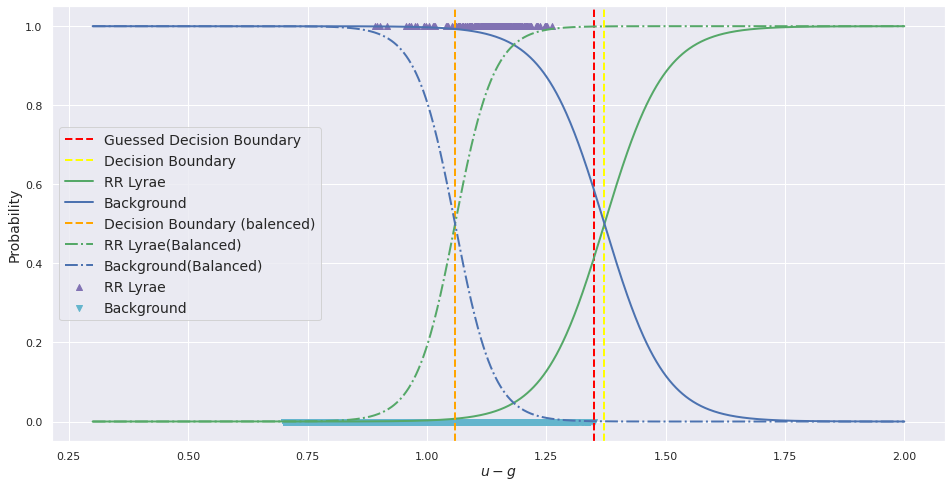

In [88]:
plot_sklearn_boundary()
plt.axvline(decision_boundary_sklearn_balanced, color='orange', linestyle="--", lw=2,
            label='Decision Boundary (balenced)')

plt.plot(X_1d_new, y_1d_proba_balanced[:, 1], "g-.", linewidth=2, label='RR Lyrae(Balanced)')
plt.plot(X_1d_new, y_1d_proba_balanced[:, 0], "b-.", linewidth=2, label="Background(Balanced)")

plt.legend(loc="center left", fontsize=14)
plt.show()

*Comment on the decision boundary of the balanced model compared to the unbalanced models fitted previously.*



The balanced model provides a much better fit. The accuracy value is lower since more background targets are classified wrongly but more RR Lyrae targets are classified correctly therefore higher precision and recall.


Now that we've built up good intuition surrounding the subtleties of the classification problem at hand in 1D, let's consider the 2D problem (we will keep to 2D for plotting convenience).

For the 2D case we consider the following colours.

In [89]:
ind = 1
cols[:ind + 1]

['u-g', 'g-r']

Consider the following training and test data for the 2D problem.

In [90]:
X_train_2d = X_train[:, :ind + 1]
X_train_2d = X_train_2d.reshape(-1, ind + 1)
X_test_2d = X_test[:, :ind + 1]
X_test_2d = X_test_2d.reshape(-1, ind + 1)

*Train a logistic regression model for this 2D problem.  Use variable `clf_2d_logistic` for your classifier.*

In [91]:
clf_2d_logistic = LogisticRegression(class_weight='balanced').fit(X_train_2d, y_train)

In [92]:
check_var_defined('clf_2d_logistic')

clf_2d_logistic defined.


*Compute the precision and recall of your 2D logistic regression model. Use variables `precision_logistic` and `recall_logistic` for your results.*

In [93]:
from sklearn.metrics import precision_score, recall_score

precision_logistic = precision_score(y_true=y_test, y_pred=clf_2d_logistic.predict(X_test_2d))
recall_logistic = recall_score(y_true=y_test, y_pred=clf_2d_logistic.predict(X_test_2d))

In [94]:
check_var_defined('precision_logistic')
print("precision_logistic = {0:.6f}".format(precision_logistic))

precision_logistic defined.
precision_logistic = 0.136808


In [95]:
check_var_defined('recall_logistic')
print("recall_logistic = {0:.6f}".format(recall_logistic))

recall_logistic defined.
recall_logistic = 0.992126


Consider the following meshgrid defining the u-g and g-r colour domain of interest.

In [96]:
xlim = (0.7, 1.45)  # u-g
ylim = (-0.15, 0.4)  # g-r
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))

*Over the domain specified above plot the predicted classification probability.  Overlay on your plot the data instances, highlighting whether a RR Lyrae or background star, and the decision boundary.*

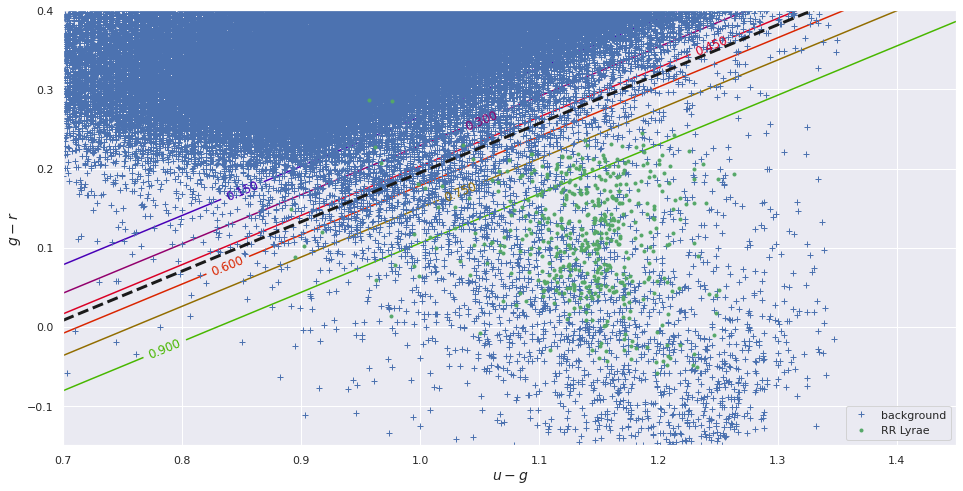

In [97]:
def scatter_data(axis_array):
    plt.figure(figsize=(16, 8))
    plt.plot(X[y == 0, 0], X[y == 0, 1], "b+", label='background')
    plt.plot(X[y == 1, 0], X[y == 1, 1], "g.", label='RR Lyrae')

    plt.xlabel("$u-g$", fontsize=14)
    plt.ylabel("$g-r$", fontsize=14)
    plt.axis(axis_array)


axis_array = np.array([0.7, 1.45, -0.15, 0.4])
scatter_data(axis_array)

X_new = np.c_[xx.ravel(), yy.ravel()]
y_proba = clf_2d_logistic.predict_proba(X_new)

zz = y_proba[:, 1].reshape(xx.shape)
contour = plt.contour(xx, yy, zz, cmap=plt.cm.brg)

left_right = axis_array[:2]
boundary = -(clf_2d_logistic.coef_[0][0] * left_right + clf_2d_logistic.intercept_[0]) / clf_2d_logistic.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)

plt.legend(loc='lower right')
plt.show()

*Now train an SVM classifier that can support a non-linear decision boundary on the same problem.*

In [98]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


polynomial_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf",SVC(kernel="rbf", gamma=10))
])
polynomial_svm_clf.fit(X_train_2d, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm_clf', SVC(gamma=10))])

*Replicate for the SVM your plot above for the 2D logistic regression model.  Over the domain specified above plot the decision function score.  Overlay on your plot the data instances, highlighting whether a RR Lyrae or background star, and the decision boundary.*

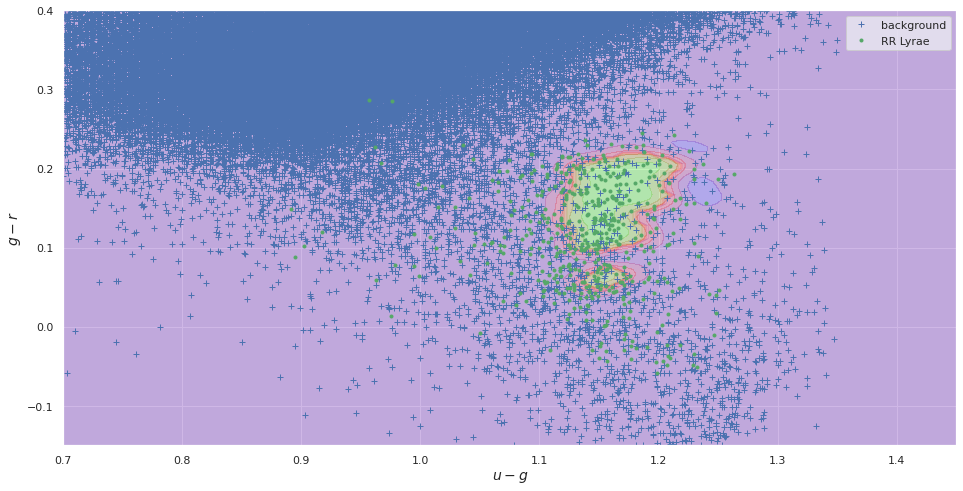

In [99]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.1)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.2)


axis_array = np.array([0.7, 1.45, -0.15, 0.4])
scatter_data(axis_array)
plot_predictions(polynomial_svm_clf, axis_array)

plt.legend()
plt.show()

*Compute the precision and recall of your 2D SVM model. Use variables `precision_svm` and `recall_svm` for your results.*

In [100]:
def precision_recall(y_true, y_pred):
    y_true = y_true.astype(np.int0)
    y_pred = y_pred.astype(np.int0)
    TP = np.sum(y_pred[y_true == 1] == 1)
    # TN = np.sum(y_pred[y_true == 0] == 0)
    FP = np.sum(y_pred[y_true == 0] == 1)
    FN = np.sum(y_pred[y_true == 1] == 0)
    return TP / (TP + FP), TP / (TP + FN)


y_train_2d_pred = polynomial_svm_clf.predict(X_test_2d)
precision_svm, recall_svm = precision_recall(y_test, y_train_2d_pred)

# precision_svm, precision_score(y_true=y_test, y_pred=y_train_2d_pred),recall_svm,recall_score(y_true=y_test, y_pred=y_train_2d_pred)

In [101]:
check_var_defined('precision_svm')
print("precision_svm = {0:.6f}".format(precision_svm))

precision_svm defined.
precision_svm = 0.549296


In [102]:
check_var_defined('recall_svm')
print("recall_svm = {0:.6f}".format(recall_svm))

recall_svm defined.
recall_svm = 0.307087


*Comment on the difference in decision boundary between your logistic regression and SVM models and how this impacts the effectiveness of the models.*

 **Logistic Regression** tries to maximize the conditional likelihood of the training data by adapting linear regression. When predicting  it simply estimates the probability of the new data falls in a class. The linear decision boundary is a consequence of the structure of the regression function and is used as of a threshold in the function to classify. It can be highly prone to outliers.

 **SVM** creates a hyperplane which separates data into classes. It uses the kernel trick to find the best line separator  (decision boundary that has same distance from the boundary point of  both classes). It is a clear and more powerful way of learning complex non-linear functions.

SVM tries to finds the “best” margin (distance between the line and the  support vectors) that separates the classes and this reduces the risk of error on the data, while logistic regression does not. Moreover, SVM can produce non-linear boundary adopting scaler functions and use different kernels (e.g.,Gaussian radial basis function (RBF)).

Regarding computation, for SVMs it is not necessary to actually compute new features for each kernel. Instead, can be done implicitly, providing *considerable* computational saving.